<a href="https://colab.research.google.com/github/ahmedabdelwahed2002/Android-application/blob/main/Assignment1Abdel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from skimage import io
from google.colab import files  # This is for file upload
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sn


In [ ]:

# Upload your dataset from your computer to Google Colab
uploaded = files.upload()
# Unzip the uploaded file (assuming it's a ZIP archive)
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('data')  # You can specify the extraction directory


In [ ]:
# Define the dimensions of your images
image_width = 92
image_height = 112
data = []
labels = []
# Loop through each subject
for subject_id in range(1, 41):
    subject_dir = os.path.join('data', f's{subject_id}')  # Update the path
    # Loop through each image for the subject
    for image_id in range(1, 11):
        # Construct the image file name
        image_name = f'{image_id}.pgm'
        # Construct the full path to the image
        image_path = os.path.join(subject_dir, image_name)
        # Load the image and flatten it into a 1D array
        image = io.imread(image_path, as_gray=True).ravel()
        # Append the image data to the data list
        data.append(image)
        # Append the corresponding label (subject ID) to the labels list
        labels.append(subject_id)
# Create the data matrix D by stacking the image vectors
D = np.array(data)
# Create the label vector y as integers from 1 to 40
y = np.array(labels)
# D should be a 2D matrix with shape (number of samples, image_width * image_height)
#D = D.reshape(-1, image_width * image_height)


In [ ]:
print(D)
# Display information about the data matrix D
print("Data Matrix D:")
print(f"Shape: {D.shape}")
print(f"Data Type: {D.dtype}")
print(f"Minimum Value: {D.min()}")
print(f"Maximum Value: {D.max()}")
print(f"Mean Value: {D.mean()}")

[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]
 [125 124 124 ...  36  35  34]]
Data Matrix D:
Shape: (400, 10304)
Data Type: uint8
Minimum Value: 0
Maximum Value: 251
Mean Value: 112.6312849378882


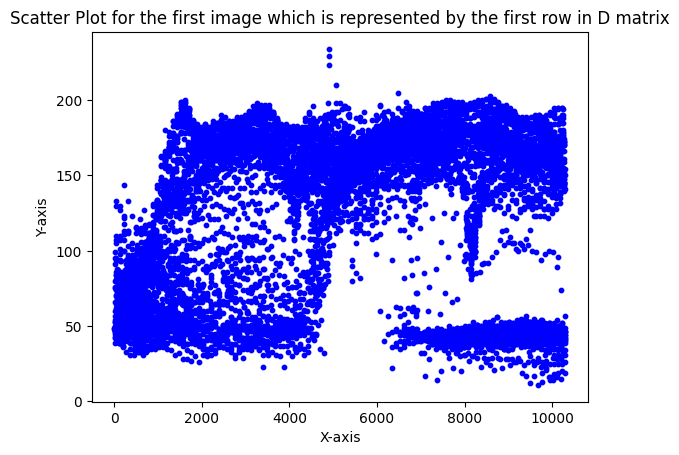

In [ ]:
row_vector = D[0, :]
x_axis = np.arange(0, 10304)
# Create a range of values from 0 to 255 for the y-axis
y_values = np.linspace(0, 255, len(row_vector))
# Create the scatter plot
plt.scatter(x_axis, row_vector, marker='o', s=10, color='b')
# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot for the first image which is represented by the first row in D matrix')
# Show the plot
plt.show()


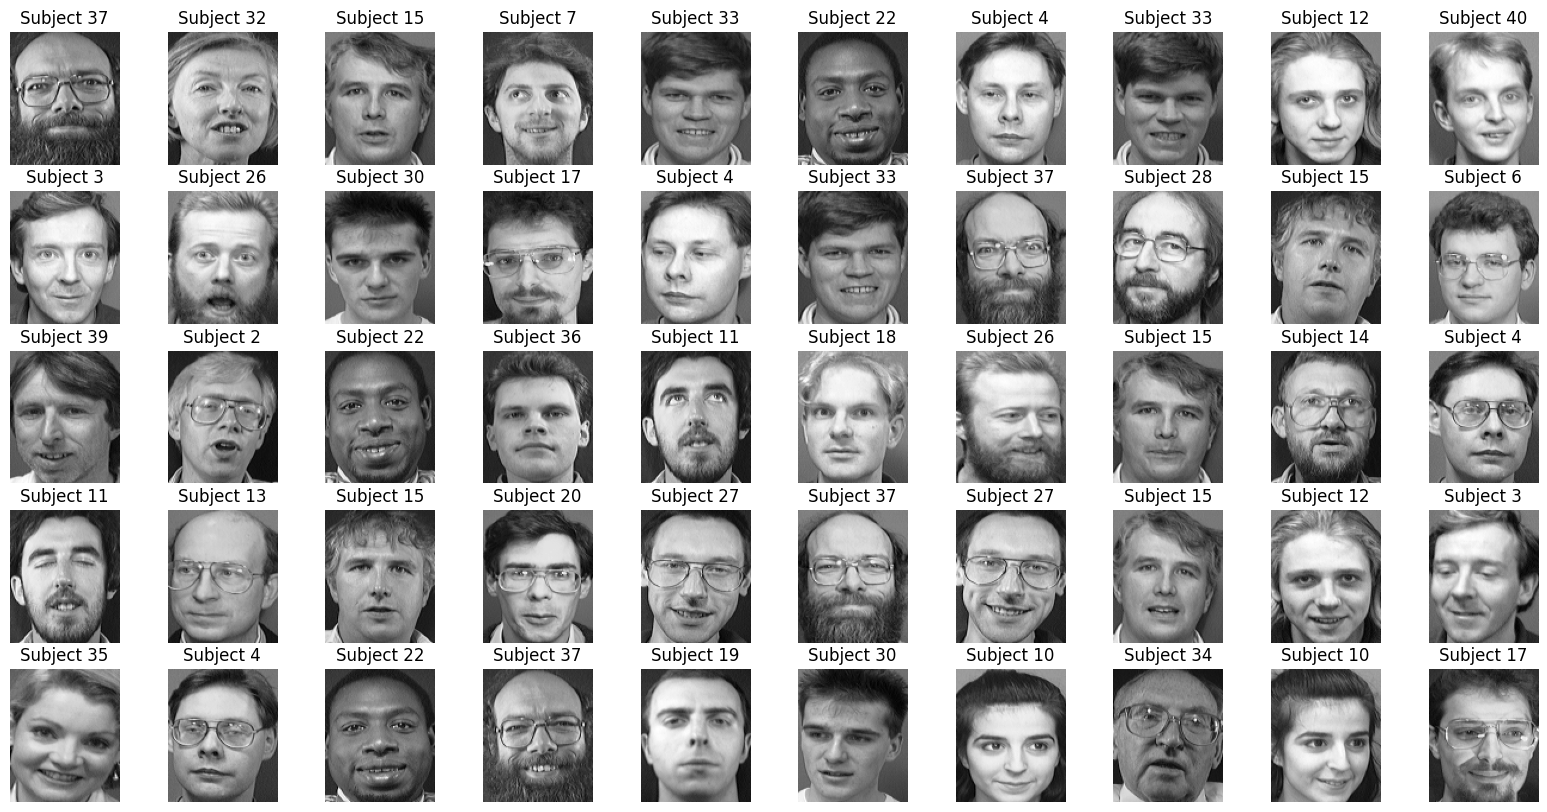

In [ ]:
# Reshape the data matrix D to a 2D matrix
temp = D.reshape(-1, image_height, image_width)

# Specify the number of subjects and images per subject
num_subjects = 40
images_per_subject = 10

# Plot a few sample images from your dataset
num_samples = 5  # Change this number as needed
fig, axes = plt.subplots(num_samples, images_per_subject, figsize=(20, 10))

for i in range(num_samples):
    for j in range(images_per_subject):
        index = np.random.randint(0, len(D))
        ax = axes[i, j]
        ax.imshow(temp[index], cmap='gray')
        ax.set_title(f"Subject {y[index]}")
        ax.axis('off')

plt.show()

In [ ]:
X_train = D[::2]
X_test = D[1::2]
y_train = y[::2]
y_test = y[1::2]

In [ ]:
# in this part i will get the covariance matrix of all data set
# Calculate the mean of each column in D
import numpy as np

column_means = np.mean(D, axis=0)
# Convert the column means into a row vector
mean_vector = column_means.reshape(1, -1)
print(mean_vector)
# Display information about the data matrix D
print("mean vector :")
print(f"Shape: {mean_vector.shape}")
print(f"Data Type: {mean_vector.dtype}")
print(f"Minimum Value: {mean_vector.min()}")
print(f"Maximum Value: {mean_vector.max()}")
print(f"Mean Value: {mean_vector.mean()}")
mean_matrix = np.tile(mean_vector, (D.shape[0], 1))
print(mean_matrix)
# Display information about the data matrix D
print("mean Matrix :")
print(f"Shape: {mean_matrix.shape}")
print(f"Data Type: {mean_matrix.dtype}")
print(f"Minimum Value: {mean_matrix.min()}")
print(f"Maximum Value: {mean_matrix.max()}")
print(f"Mean Value: {mean_matrix.mean()}")
DNormalized = D - mean_matrix
num_Rows_D = D.shape[0]
# Calculate the covariance matrix
covMatrix = (1 / (num_Rows_D - 1)) * (DNormalized.T @ DNormalized)
print("Cov Matrix :")
print(covMatrix)
print(f"Shape: {covMatrix.shape}")

covariance_matrixGPT = np.cov(DNormalized, rowvar=False)
# Print the covariance matrix
print("Covariance Matrix of Chat gpt:")
print(covariance_matrixGPT)
print(f"Shape: {covariance_matrixGPT.shape}")


[[85.6175 85.5775 85.925  ... 76.87   75.865  75.2275]]
mean vector :
Shape: (1, 10304)
Data Type: float64
Minimum Value: 59.895
Maximum Value: 172.0425
Mean Value: 112.6312849378882
[[85.6175 85.5775 85.925  ... 76.87   75.865  75.2275]
 [85.6175 85.5775 85.925  ... 76.87   75.865  75.2275]
 [85.6175 85.5775 85.925  ... 76.87   75.865  75.2275]
 ...
 [85.6175 85.5775 85.925  ... 76.87   75.865  75.2275]
 [85.6175 85.5775 85.925  ... 76.87   75.865  75.2275]
 [85.6175 85.5775 85.925  ... 76.87   75.865  75.2275]]
mean Matrix :
Shape: (400, 10304)
Data Type: float64
Minimum Value: 59.895
Maximum Value: 172.0425
Mean Value: 112.63128493788804
Cov Matrix :
[[1283.65031955 1271.88059524 1266.10407268 ... -153.3506015
  -112.43522556  -58.93531955]
 [1271.88059524 1276.58044486 1263.86296992 ... -150.44854637
  -110.82660401  -58.63296366]
 [1266.10407268 1263.86296992 1267.87406015 ... -148.6914787
  -105.79461153  -57.20093985]
 ...
 [-153.3506015  -150.44854637 -148.6914787  ... 2205.176

In [ ]:
U, V = np.linalg.eigh(covariance_matrixGPT)#DNormalized.T)
print("mean eigenvalues :")
#print(S)
# Display information about the data matrix D

#each c olumn represents an eigen vector
#print(f"Shape: {S.shape}")
#print(f"Minimum Value: {S.min()}")
#print(f"Maximum Value: {S.max()}")
#print(f"Mean Value: {S.mean()}")
#print("mean eigenvalues :")
#print(U)
# Display information about the data matrix D

#each column represents an eigen vector


# S is a row vector containing all eigen values
# where the first element is the largest one
#sum_of_elements = np.sum(S)
#print(sum_of_elements)

mean eigenvalues :
Shape: (10304,)
Data Type: float64
Minimum Value: -1.6934728630367364e-09
Maximum Value: 2823910.0644456116
Mean Value: 1556.312331570141


In [ ]:
print("eigen vector ")
print(V)
print(f"Shape: {V.shape}")
print(f"Data Type: {V.dtype}")
print(f"Minimum Value: {V.min()}")
print(f"Maximum Value: {V.max()}")
print(f"Mean Value: {V.mean()}")
print("eigen values")
print(U)
print(f"Shape: {U.shape}")
print(f"Data Type: {U.dtype}")
print(f"Minimum Value: {U.min()}")
print(f"Maximum Value: {U.max()}")
print(f"Mean Value: {U.mean()}")
sum_of_values = np.sum(U)


eigen vector 
[[ 0.          0.         -0.         ... -0.01992949 -0.01468515
   0.00212508]
 [-0.00806127  0.47784612  0.2530342  ... -0.0200092  -0.01461394
   0.00211277]
 [-0.33475963 -0.45731483  0.30978665 ... -0.01983852 -0.01463186
   0.0021425 ]
 ...
 [-0.00226908 -0.01140472  0.00574035 ... -0.01416368  0.01056104
   0.00704006]
 [-0.0085603   0.0023247  -0.03182462 ... -0.01439436  0.0097007
   0.00639096]
 [ 0.01084381 -0.00601864  0.01616447 ... -0.01487489  0.00881892
   0.00734479]]
Shape: (10304, 10304)
Data Type: float64
Minimum Value: -0.9952007414052291
Maximum Value: 0.6802891655775782
Mean Value: -9.56380579007631e-07
eigen values
[-1.69347286e-09 -1.59804599e-09 -1.20320194e-09 ...  1.09704614e+06
  2.06973946e+06  2.82391006e+06]
Shape: (10304,)
Data Type: float64
Minimum Value: -1.6934728630367364e-09
Maximum Value: 2823910.0644456116
Mean Value: 1556.312331570141


In [ ]:
# Note U -> is eigen values
# V -> eigen vectors

In [ ]:
idx = U.argsort()[::-1]
eigenvalues = U[idx]
eigenvectors = V[:,idx]
print(eigenvalues)
print(eigenvectors)

[ 2.82391006e+06  2.06973946e+06  1.09704614e+06 ... -1.20320194e-09
 -1.59804599e-09 -1.69347286e-09]
[[ 0.00212508 -0.01468515 -0.01992949 ... -0.          0.
   0.        ]
 [ 0.00211277 -0.01461394 -0.0200092  ...  0.2530342   0.47784612
  -0.00806127]
 [ 0.0021425  -0.01463186 -0.01983852 ...  0.30978665 -0.45731483
  -0.33475963]
 ...
 [ 0.00704006  0.01056104 -0.01416368 ...  0.00574035 -0.01140472
  -0.00226908]
 [ 0.00639096  0.0097007  -0.01439436 ... -0.03182462  0.0023247
  -0.0085603 ]
 [ 0.00734479  0.00881892 -0.01487489 ...  0.01616447 -0.00601864
   0.01084381]]


reducedBasis : 
alpha: 0.8
[[ 0.00212508 -0.01468515 -0.01992949 ... -0.00143858  0.00050322
   0.00526533]
 [ 0.00211277 -0.01461394 -0.0200092  ... -0.00272956  0.00088097
   0.0046739 ]
 [ 0.0021425  -0.01463186 -0.01983852 ... -0.00056518  0.00125794
   0.00424246]
 ...
 [ 0.00704006  0.01056104 -0.01416368 ... -0.00875794  0.00195487
   0.01105691]
 [ 0.00639096  0.0097007  -0.01439436 ... -0.00441068  0.00399899
   0.01164287]
 [ 0.00734479  0.00881892 -0.01487489 ... -0.00701014  0.00269755
   0.00935926]]
Shape: (10304, 44)
Data Type: float64
Minimum Value: -0.05227493060290541
Maximum Value: 0.04750981220358952
Mean Value: -0.00023016667032252683



classifier score : 0.95




Alpha: 0.8, Accuracy: 0.95
----------------------confusion matrix----------------------
[[5 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 2]]
reducedBasis : 
alpha: 0.85
[[ 0.00212508 -0.01468515 -0.01992949 ... -0.00463863  0.0039175
   0

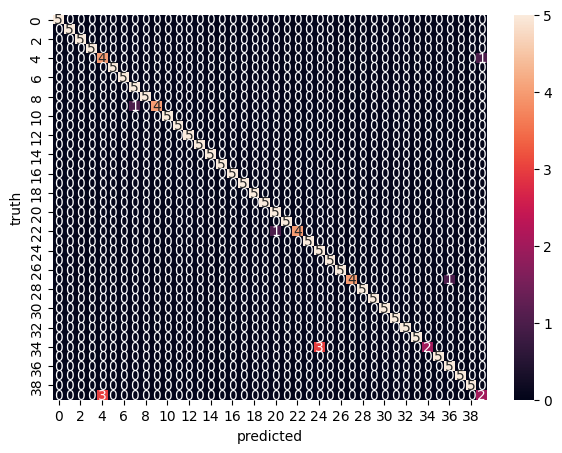

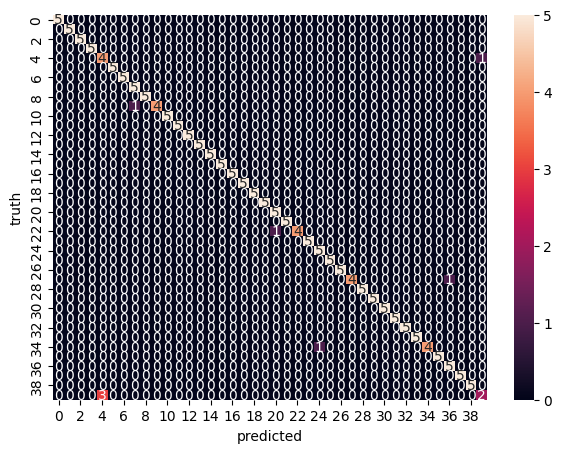

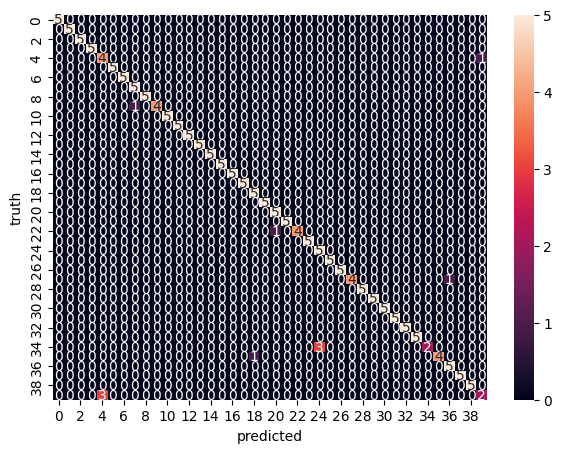

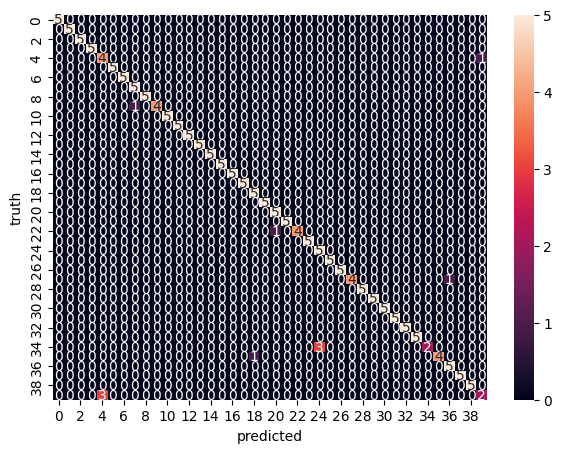

In [ ]:
alpha = np.array([0.8,0.85,0.9,0.95])
ASize = alpha.size
for i in range(ASize):
  CurrSum = 0
  SSize = eigenvalues.size
  for j in range(SSize):
    CurrSum = CurrSum + eigenvalues[j]
    #accuracy_results =[]
    if CurrSum / sum_of_values >= alpha[i]:
       reducedBasis = eigenvectors[:, :j+1].copy()  # j+1 to include the jth column
       print("reducedBasis : ")
       print(f"alpha: {alpha[i]}")
       print(reducedBasis)
       print(f"Shape: {reducedBasis.shape}")
       print(f"Data Type: {reducedBasis.dtype}")
       print(f"Minimum Value: {reducedBasis.min()}")
       print(f"Maximum Value: {reducedBasis.max()}")
       print(f"Mean Value: {reducedBasis.mean()}")
       X_train_projected = X_train @ reducedBasis
       # Project the test data onto the reduced basis matrix
       X_test_projected = X_test @ reducedBasis
       # Create a Nearest Neighbor classifier
       hyperPar = [1,3,5,7]
       classifier = KNeighborsClassifier(n_neighbors=1)
       # Fit the classifier on the projected training data and labels
       classifier.fit(X_train_projected, y_train)
       # Predict the labels for the projected test data
       y_pred = classifier.predict(X_test_projected)
       # Calculate the accuracy for this alpha value
       accuracy = accuracy_score(y_test, y_pred)
       # Store the accuracy in the results dictionary
       score = classifier.score(X_test_projected,y_test)
       print(f"\n\n\nclassifier score : {score}\n\n\n\n")
       print(f"Alpha: {alpha[i]}, Accuracy: {accuracy}")
       print("----------------------confusion matrix----------------------")
       from sklearn.metrics import confusion_matrix
       cm = confusion_matrix(y_test,y_pred)
       print(cm)
       plt.figure(figsize = (7,5))
       sn.heatmap(cm, annot=True)
       plt.xlabel('predicted')
       plt.ylabel('truth')

       break
       # Print the accuracy results for each alpha


